In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
# Drop unnecessary index column if present
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)

# Check again for missing values
df.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


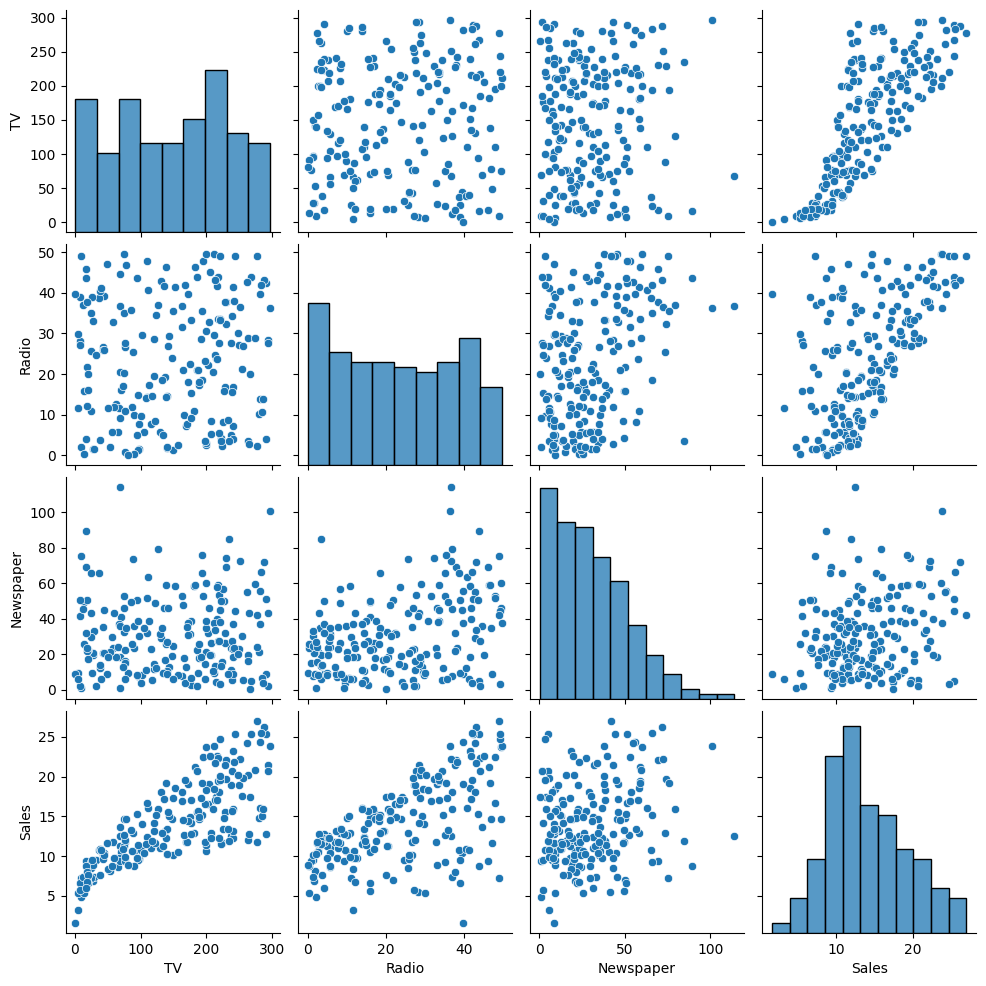

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']                      # Target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE : 1.4607567168117603
MSE : 3.1740973539761033
RMSE: 1.78159966153345
R² Score: 0.899438024100912


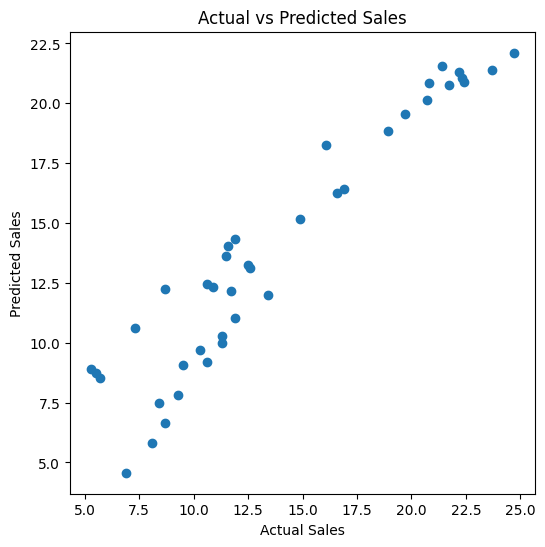

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_
})

print(coefficients)

     Feature    Impact
0         TV  0.044730
1      Radio  0.189195
2  Newspaper  0.002761


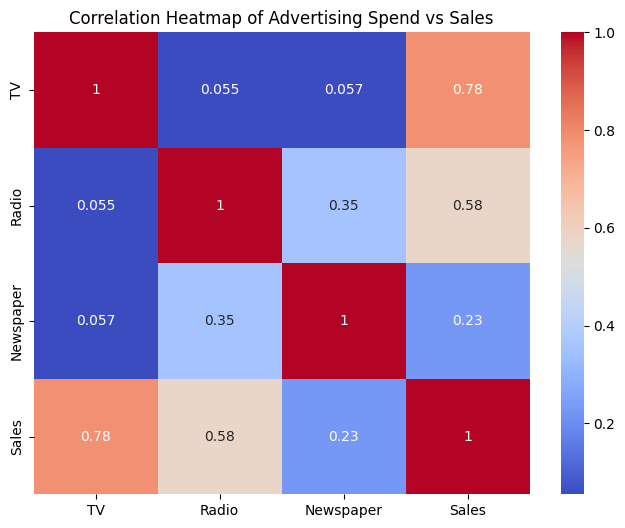

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Advertising Spend vs Sales")
plt.show()

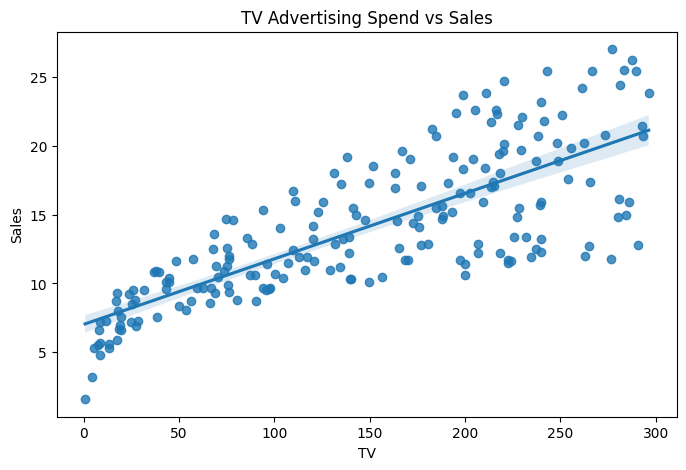

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x='TV', y='Sales', data=df)
plt.title("TV Advertising Spend vs Sales")
plt.show()

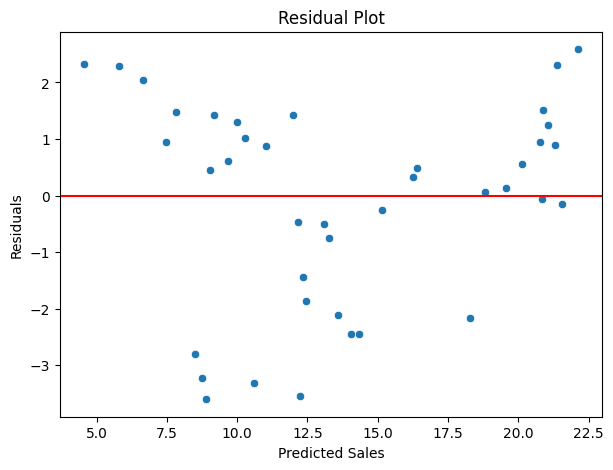

In [ ]:
#Residual Plot (Model Error Analysis)
residuals = y_test - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

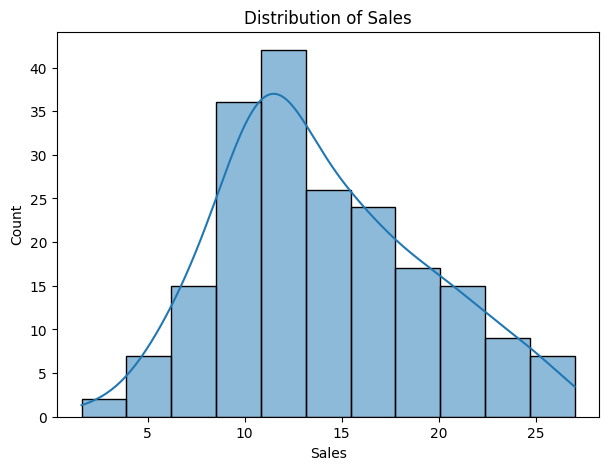

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Sales'], kde=True)
plt.title("Distribution of Sales")
plt.show()


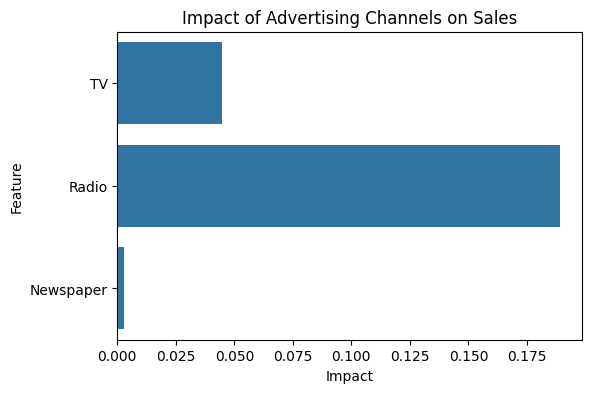

In [ ]:
impact = pd.DataFrame({
    'Feature': X.columns,
    'Impact': model.coef_
})

plt.figure(figsize=(6,4))
sns.barplot(x='Impact', y='Feature', data=impact)
plt.title("Impact of Advertising Channels on Sales")
plt.show()

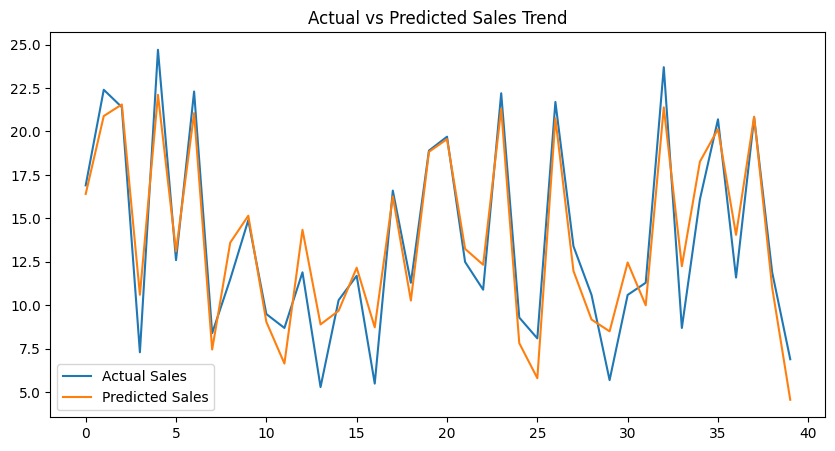

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title("Actual vs Predicted Sales Trend")
plt.show()

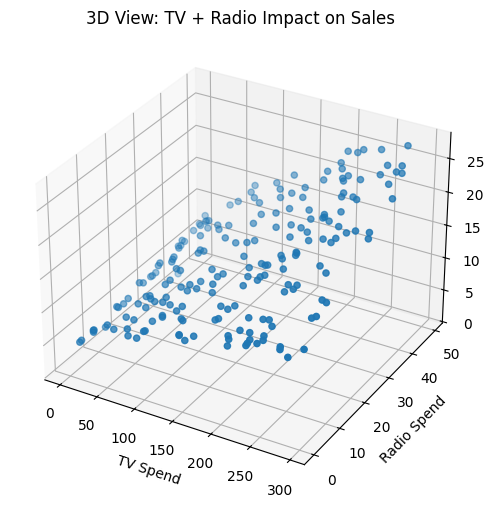

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['TV'], df['Radio'], df['Sales'])
ax.set_xlabel("TV Spend")
ax.set_ylabel("Radio Spend")
ax.set_zlabel("Sales")
ax.set_title("3D View: TV + Radio Impact on Sales")

plt.show()

In [ ]:
new_campaign = pd.DataFrame({
    'TV': [200],
    'Radio': [40],
    'Newspaper': [30]
})

predicted_sales = model.predict(new_campaign)
print("Predicted Sales for new campaign:", predicted_sales[0])

Predicted Sales for new campaign: 19.575606431481972
